# Importando Dados

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))

<Figure size 360x576 with 0 Axes>

<Figure size 360x576 with 0 Axes>

In [ ]:
#importando dados das notas de filmes
notas = pd.read_csv("ratings.csv", sep=',')
notas.columns = ["Id usuario", "IdFilme", "Nota","Momento"]
notas.head()

,Id usuario,IdFilme,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#importando dados dos tipos de filmes
filmes = pd.read_csv("movies.csv", sep=',')
filmes.columns = ["IdFilme", "Nome", "Genero"]
filmes.head()

,IdFilme,Nome,Genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando os dados

In [ ]:
notas.Nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

In [ ]:
print("Media das notas -> ",notas.Nota.mean())
print("Mediana das notas -> ",notas.Nota.median())

Media das notas ->  3.501556983616962
Mediana das notas ->  3.5


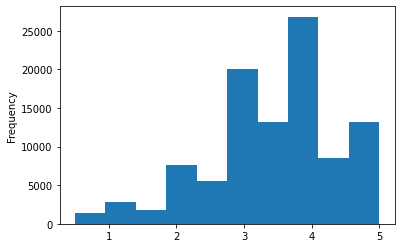

In [ ]:
#histograma das notas
notas.Nota.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


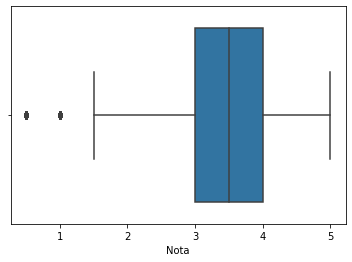

In [ ]:
#boxplot das notas
sns.boxplot(notas.Nota)

In [ ]:
#grupo que representa a media por filme
media_por_filme = notas.groupby("IdFilme")["Nota"].mean()
media_por_filme.head()

IdFilme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

In [ ]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


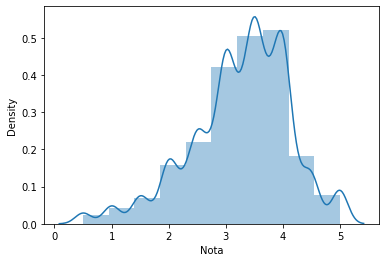

In [ ]:
#histograma da media de notas por filme seaborn
sns.distplot(media_por_filme, bins=10)

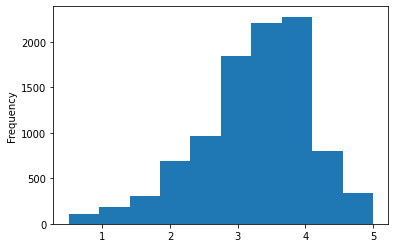

In [ ]:
#histograma da media de notas por filme pandas
media_por_filme.plot(kind='hist')

In [ ]:
# Função que retorna varias estatisticas de um filme, basta colocar o id do filme como parametro
def analisa_filme(id):
  selecao = notas.query(f"IdFilme=={id}")
  nome_filme = filmes.query(f"IdFilme=={id}")["Nome"].values[0]
  nota_media = float("%.2f" % selecao["Nota"].mean())
  nota_mediana = float("%.2f" % selecao["Nota"].median())
  desvio_padrão = float("%.2f" % selecao["Nota"].std())
  boxplot = sns.boxplot(selecao["Nota"])
  histograma = sns.catplot(x="Nota",kind="count",data=selecao)
  quantos_votaram = selecao["Nota"].value_counts().sum()
  
  print(boxplot)  
  print(histograma)
  print(f"a nota media do filme {nome_filme} é {nota_media}")
  print(f"a nota mediana do filme {nome_filme} é {nota_mediana}")
  print(f"O numero total de votos do filme {nome_filme} foi de {quantos_votaram}")
  print(f"O desvio padrao vale {desvio_padrão}")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)
a nota media do filme Father of the Bride Part II (1995) é 3.07
a nota mediana do filme Father of the Bride Part II (1995) é 3.0
O numero total de votos do filme Father of the Bride Part II (1995) foi de 49
O desvio padrao vale 0.91


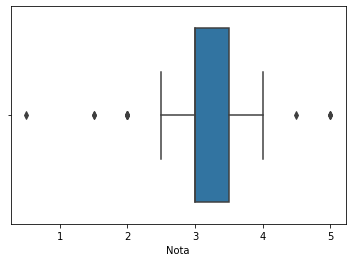

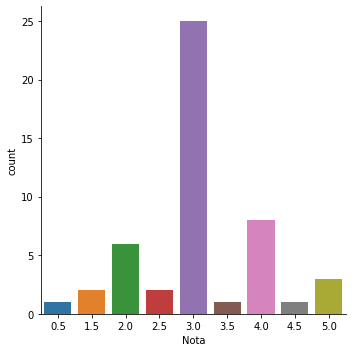

In [ ]:
analisa_filme(5)

# Importando outra base dados de filmes

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv", sep=',')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

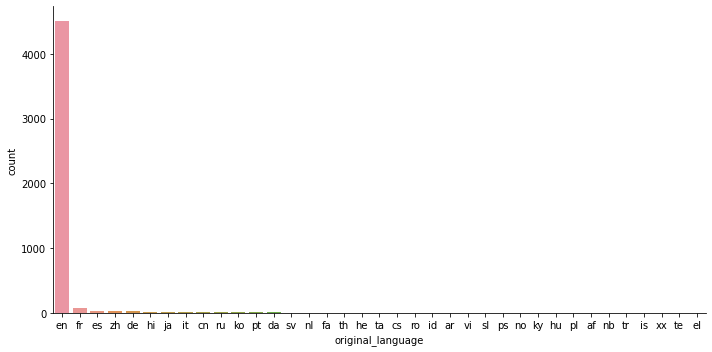

In [ ]:
#Analisando a quantidade de filmes que possuem determinada linguagem
sns.catplot(x="original_language", kind="count", data=tmdb, aspect=2, order= tmdb["original_language"].value_counts().index)

In [ ]:
lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
lingua.head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


([<matplotlib.patches.Wedge at 0x7f580f5a9f50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

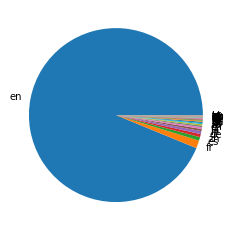

In [ ]:
#criando grafico com muitos indices
plt.pie(lingua["original_language"], labels =lingua["index"] )

In [ ]:
lingua = tmdb["original_language"].value_counts()

In [ ]:
total_ingles = lingua.loc["en"]
total_n_ingles = lingua.sum() - total_ingles

In [ ]:
total_ingles

4505

In [ ]:
total_n_ingles

298

In [ ]:
dados = {"lingua":["ingles","outros"], "quantidade":[total_ingles, total_n_ingles]}
df = pd.DataFrame(dados)
df

,lingua,quantidade
0,ingles,4505
1,outros,298


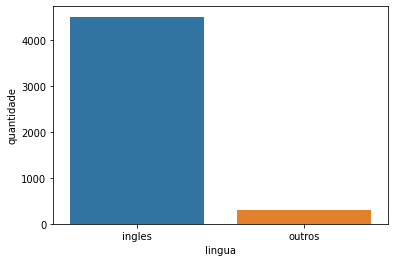

In [ ]:
sns.barplot(x="lingua",y="quantidade",data=df)

([<matplotlib.patches.Wedge at 0x7f580f480e10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')],
 [Text(-0.5886380474454503, 0.11621208671910063, '93.8%'),
  Text(0.5886380460853802, -0.11621209360813456, '6.2%')])

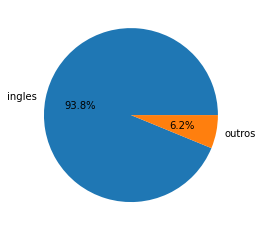

In [ ]:
plt.pie(df["quantidade"], labels =df["lingua"], autopct='%1.1f%%')

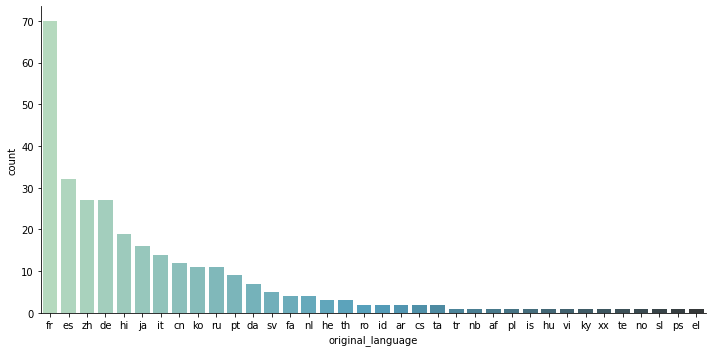

In [ ]:
filmes_n_ingles = tmdb.query("original_language != 'en'")
sns.catplot(data = filmes_n_ingles, 
            kind= "count",x="original_language", 
            aspect = 2, order = filmes_n_ingles["original_language"].value_counts().index, palette="GnBu_d")